In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
%matplotlib inline

In [3]:
# Importing data source file
df = pd.read_excel("Week2_challenge_data_source.xlsx")

In [4]:
"""
Using .info() to get basic structure of the dataframe.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

There are 15001 rows and 55 columns. The dataframe contains most columns with float data type and a few date time and object data types.
A number of columns have missing values 

In [5]:
df.shape

(150001, 55)

## Summary Statistics

In [6]:
df.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,148848,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
unique,134709,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,2019-04-29 07:08:38,NaN,2019-04-25 00:01:33,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,991,14,NaN,65,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,NaN,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,NaN,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,NaN,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,NaN,NaN,250.000000,NaN,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,NaN,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08


# Unique values

In [8]:
df.nunique()

Bearer Id                                   134709
Start                                       111881
Start ms                                      1000
End                                         100962
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

## Distributions

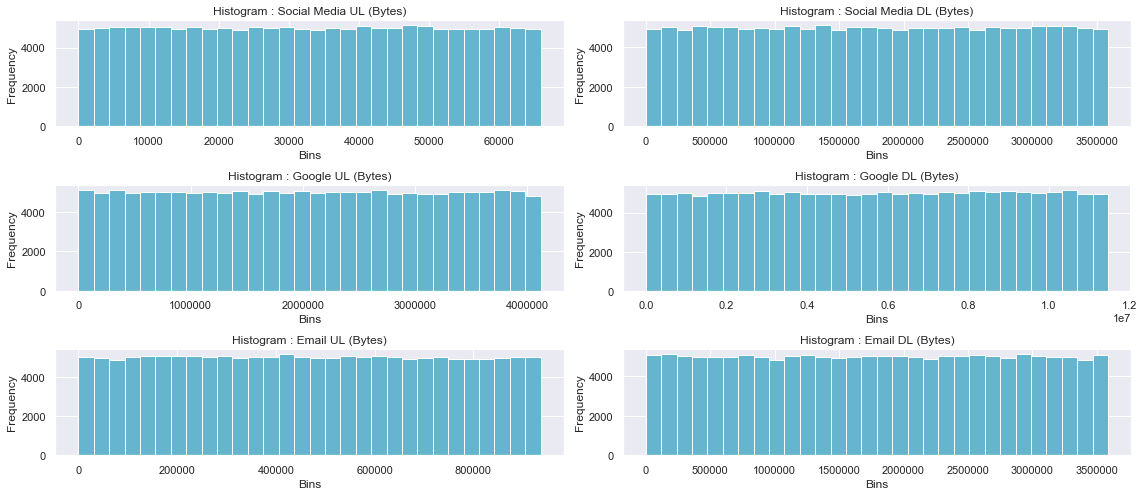

In [9]:
f, ax_arr = plt.subplots(3,2, figsize=(16,7))

# Plot 1.1
ax_arr[0,0].hist(df['Social Media UL (Bytes)'], bins=30, color='c')
ax_arr[0,0].set_title('Histogram : Social Media UL (Bytes)')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Frequency')

# Plot 1.2
ax_arr[0,1].hist(df['Social Media DL (Bytes)'], bins=30, color='c')
ax_arr[0,1].set_title('Histogram : Social Media DL (Bytes)')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Frequency')

# Plot 2.1
ax_arr[1,0].hist(df['Google UL (Bytes)'], bins=30, color='c')
ax_arr[1,0].set_title('Histogram : Google UL (Bytes)')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Frequency')

# Plot 2.2
ax_arr[1,1].hist(df['Google DL (Bytes)'], bins=30, color='c')
ax_arr[1,1].set_title('Histogram : Google DL (Bytes)')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Frequency')

# Plot 3.1
ax_arr[2,0].hist(df['Email UL (Bytes)'], bins=30, color='c')
ax_arr[2,0].set_title('Histogram : Email UL (Bytes)')
ax_arr[2,0].set_xlabel('Bins')
ax_arr[2,0].set_ylabel('Frequency')

# Plot 3.2
ax_arr[2,1].hist(df['Email DL (Bytes)'], bins=30, color='c')
ax_arr[2,1].set_title('Histogram : Email DL (Bytes)')
ax_arr[2,1].set_xlabel('Bins')
ax_arr[2,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms used shows uniform distribution of both upload and download data frequencies for all the three applications displayed above

## Dealing with missing values 

In [10]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

## Choosing columns of interest which has missing values.

### Column : Handset Type

In [11]:
handset_type_count = df['Handset Type'].value_counts()
handset_type_count

Huawei B528S-23A                            19752
Apple iPhone 6S (A1688)                      9419
Apple iPhone 6 (A1586)                       9023
undefined                                    8987
Apple iPhone 7 (A1778)                       6326
                                            ...  
Lemobile Informa. Le X527                       1
Infinix Technolo. Infinix Surf Bravo            1
Concox Informati. Concox Gt06 Gt06N Tr06        1
Mptech Hammer Energy 18X9                       1
Sony Mobile Comm. Sony Xperia Z2 (D6503)        1
Name: Handset Type, Length: 1396, dtype: int64

From the value counts above, for the 'Handset Type' column, Huawei B528S-23A has the most frequency or mode. Hence the value will be used to fill missing values in that column.

In [12]:
# Imputing the missing value in 'Handset value' with 'Huawei B528S-23A'
df['Handset Type'].fillna('Huawei B528S-23A', inplace=True)

In [13]:
# Checking if the column 'Handset Type' have any missing values
df['Handset Type'].isnull().sum()

0

### Column: Handset manufacturer

In [14]:
handset_man_count = df['Handset Manufacturer'].value_counts()
handset_man_count

Apple                                  59565
Samsung                                40839
Huawei                                 34423
undefined                               8987
Sony Mobile Communications Ab            980
                                       ...  
Doke Communication (Hk) Limited            1
Lephone                                    1
Kazam Mobile Limited                       1
Tianlong International (Hk) Co Ltd         1
Hongkong Ipro Technology Co Limited        1
Name: Handset Manufacturer, Length: 170, dtype: int64

From the value counts above, Apple is the handset manufucterer with the highest mode, hence can be used to fill the missing values.

In [15]:
df.loc[df['Handset Manufacturer'].isnull(), 'Handset Manufacturer'] = 'Apple'

In [16]:
df['Handset Manufacturer'].isnull().sum()

0

### Column : Total UL

In [17]:
"""
Since Total UL is a numerical column, the median value will be used to fill the missing value.
The median value is used since it cannot be easily affected by outliers, unlike using the mean value
"""

# Computing the median value for 'Total UL' column
totalUL_median_value = df['Total UL (Bytes)'].median()
totalUL_median_value

41143312.0

In [18]:
# Imputing the missing value in Total UL column with the column's value
df['Total UL (Bytes)'].fillna(totalUL_median_value, inplace=True)

In [19]:
df['Total UL (Bytes)'].isnull().sum()

0

### Column: Total DL

In [20]:
# Computing the median value for 'Total UL' column
totalDL_median_value = df['Total DL (Bytes)'].median()
totalDL_median_value

455841077.5

In [21]:
# Imputing the missing value in Total DL column with the column's value
df['Total DL (Bytes)'].fillna(totalDL_median_value, inplace=True)

In [22]:
df['Total DL (Bytes)'].isnull().sum()

0

### Column : Dur. (ms).1

In [23]:
# Computing the median value for 'Dur. (ms).1' column
Dur_ms_median_value = df['Dur. (ms).1'].median()
Dur_ms_median_value

86399983.0

In [24]:
# Imputing the missing value in Total DL column with the column's value
df['Dur. (ms).1'].fillna(Dur_ms_median_value, inplace=True)

In [25]:
df['Dur. (ms).1'].isnull().sum()

0

### Column : MSISDN/Number 

In [67]:
# Computing the median value for 'MSISDN/Number' column
Msisdn_median = df['MSISDN/Number'].median()

# Imputing the missing value in Total DL column with the column's value
df['MSISDN/Number'].fillna(Msisdn_median, inplace=True)

df['MSISDN/Number'].isnull().sum()

0

#### Column : Avg RTT DL (ms) 

In [68]:
# Computing the median value for 'MSISDN/Number' column
RTT_DL_median = df['Avg RTT DL (ms)'].median()

# Imputing the missing value in Total DL column with the column's value
df['Avg RTT DL (ms)'].fillna(RTT_DL_median, inplace=True)

df['Avg RTT DL (ms)'].isnull().sum()

0

#### Column : Avg RTT UL (ms)

In [70]:
# Computing the median value for 'MSISDN/Number' column
RTT_UL_median = df['Avg RTT UL (ms)'].median()

# Imputing the missing value in Total DL column with the column's value
df['Avg RTT UL (ms)'].fillna(RTT_UL_median, inplace=True)

df['Avg RTT UL (ms)'].isnull().sum()

0

#### Column : Avg Bearer TP UL (kbps)

In [78]:
# Computing the median value for 'MSISDN/Number' column
Bearer_TP_UL_median = df['Avg Bearer TP UL (kbps)'].median()

# Imputing the missing value in Total DL column with the column's value
df['Avg Bearer TP UL (kbps)'].fillna(Bearer_TP_UL_median, inplace=True)

df['Avg Bearer TP UL (kbps)'].isnull().sum()

0

#### Column : Avg Bearer TP DL (kbps)

In [80]:
# Computing the median value for 'MSISDN/Number' column
Bearer_TP_DL_median = df['Avg Bearer TP DL (kbps)'].median()

# Imputing the missing value in Total DL column with the column's value
df['Avg Bearer TP DL (kbps)'].fillna(Bearer_TP_DL_median, inplace=True)

df['Avg Bearer TP DL (kbps)'].isnull().sum()

0

#### Column : TCP DL Retrans. Vol (Bytes)

In [83]:
# Computing the median value for 'MSISDN/Number' column
TCP_DL_Retrans_median = df['TCP DL Retrans. Vol (Bytes)'].median()

# Imputing the missing value in Total DL column with the column's value
df['TCP DL Retrans. Vol (Bytes)'].fillna(TCP_DL_Retrans_median, inplace=True)

df['TCP DL Retrans. Vol (Bytes)'].isnull().sum()

0

## Detecting with outliers 

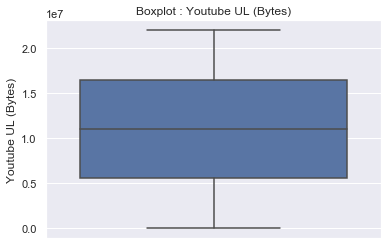

In [29]:
sns.boxplot(y=df['Youtube UL (Bytes)'])
plt.title('Boxplot : Youtube UL (Bytes)')
plt.show()

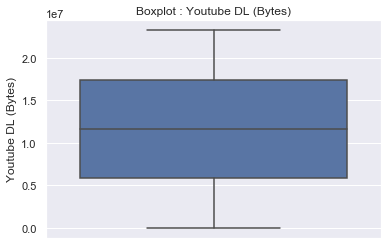

In [30]:
sns.boxplot(y=df['Youtube DL (Bytes)'])
plt.title('Boxplot : Youtube DL (Bytes)')
plt.show()

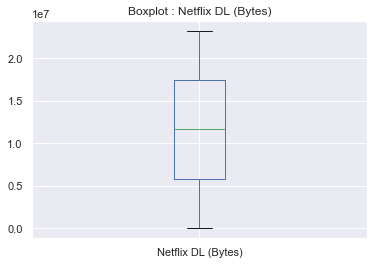

In [31]:
df['Netflix DL (Bytes)'].plot(kind='box');
plt.title('Boxplot : Netflix DL (Bytes)')
plt.show()

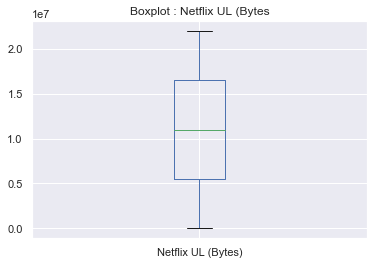

In [32]:
df['Netflix UL (Bytes)'].plot(kind='box');
plt.title('Boxplot : Netflix UL (Bytes')
plt.show()

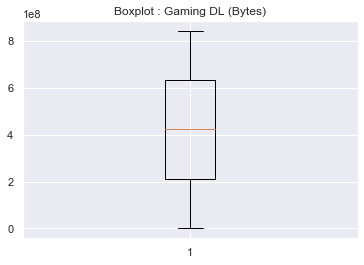

In [33]:
plt.boxplot(df['Gaming DL (Bytes)'].values);
plt.title('Boxplot : Gaming DL (Bytes)')
plt.show()

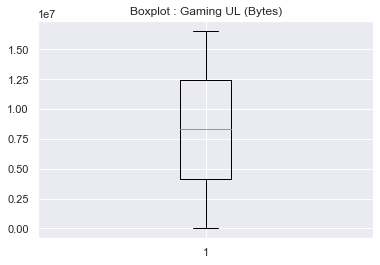

In [34]:
plt.boxplot(df['Gaming UL (Bytes)'].values);
plt.title('Boxplot : Gaming UL (Bytes)')
plt.show()

# Finding the top 10 handsets used by customers

In [35]:
# filtering out 'undfined values' from the Handset Type column
good_handset_type_values = df[(df['Handset Type'] != 'undefined')]

In [36]:
good_handset_type_values['Handset Type'].head(10)

0              Samsung Galaxy A5 Sm-A520F
1             Samsung Galaxy J5 (Sm-J530)
2                Samsung Galaxy A8 (2018)
4                        Samsung Sm-G390F
6                     Huawei Mate 20 Lite
8                Samsung Galaxy A8 (2018)
9     Samsung Galaxy Note 8 (Sm-N950F Ds)
11                        Huawei B593S-22
12             Samsung Galaxy A5 Sm-A520F
13    Samsung Galaxy Note 8 (Sm-N950F Ds)
Name: Handset Type, dtype: object

In [37]:
# using value_counts to find the frequency of handsets
handset_type_count = good_handset_type_values['Handset Type'].value_counts()

In [38]:
# Since the handset values are already sorted in decending form, using .head(10) gives us the top 10 most used handsets
handset_type_count.head(10)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

# Finding the top 3 handset manufacturers

In [39]:
# filtering out 'undfined values' from the Handset Type column
good_handset_manuf_values = df[(df['Handset Manufacturer']  != 'undefined')]

In [40]:
# using value_counts to find the frequency of handsets
handset_manf_count = good_handset_manuf_values['Handset Manufacturer'].value_counts()
handset_manf_count

Apple                                  60137
Samsung                                40839
Huawei                                 34423
Sony Mobile Communications Ab            980
Wiko Global Sasu                         747
                                       ...  
Doke Communication (Hk) Limited            1
Lephone                                    1
Kazam Mobile Limited                       1
Tianlong International (Hk) Co Ltd         1
Hongkong Ipro Technology Co Limited        1
Name: Handset Manufacturer, Length: 169, dtype: int64

In [41]:
top3_handset_manf = handset_manf_count.head(3)
top3_handset_manf

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

# Identifying top 5 handsets per handset manufacturer

In [42]:
top3_handset_manf

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [43]:
good_handset_manuf = df[(df['Handset Manufacturer'] == 'Apple') |
                       (df['Handset Manufacturer'] == 'Samsung') |
                       (df['Handset Manufacturer'] == 'Huawei')]

In [44]:
good_handset_count = good_handset_manuf.groupby(["Handset Manufacturer"])["Handset Type"].value_counts()

### Finding relations between variables in the dataset

In [45]:
df['Bearer Id']

0         13114483460844900352
1         13114483482878900224
2         13114483484080500736
3         13114483485442799616
4         13114483499480700928
                  ...         
149996     7277825670196679680
149997     7349883264234609664
149998    13114483573367300096
149999    13114483573367300096
150000                        
Name: Bearer Id, Length: 150001, dtype: object

# Task 1.1

## Number of xDR sessions

In [46]:
xDR_sessions = df.groupby(['MSISDN/Number']).agg({'Bearer Id': 'count'})

In [47]:
xDR_sessions

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


# Session Duration

In [48]:
Session_duration = df.groupby(['MSISDN/Number']).agg({'Dur. (ms)': [sum]})

In [49]:
Session_duration

,Dur. (ms)
,sum
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,37104.0
...,...
3.379000e+10,8810.0
3.379000e+10,140988.0


# Total download (DL) and upload (UL) data

In [50]:
# renaming columns
df = df.rename(columns={'Social Media DL (Bytes)': 'Social_media_DL'})
df = df.rename(columns={'Social Media UL (Bytes)': 'Social_media_UL'})

df = df.rename(columns={'Google DL (Bytes)': 'Google_DL'})
df = df.rename(columns={'Google UL (Bytes)': 'Google_UL'})

df = df.rename(columns={'Email DL (Bytes)': 'Email_DL'})
df = df.rename(columns={'Email UL (Bytes)': 'Email_UL'})

df = df.rename(columns={'Youtube DL (Bytes)': 'Youtube_DL'})
df = df.rename(columns={'Youtube UL (Bytes)': 'Youtube_UL'})

df = df.rename(columns={'Netflix DL (Bytes)': 'Netflix_DL'})
df = df.rename(columns={'Netflix UL (Bytes)': 'Netflix_UL'})

df = df.rename(columns={'Gaming DL (Bytes)': 'Gaming_DL'})
df = df.rename(columns={'Gaming UL (Bytes)': 'Gaming_UL'})

df = df.rename(columns={'Other DL (Bytes)': 'Other_DL'})
df = df.rename(columns={'Other UL (Bytes)': 'Other_UL'})

In [51]:
# Total download (DL) and upload (UL) data
df.eval('Total_Social_media = Social_media_DL + Social_media_UL', inplace=True)
df.eval('Total_Google = Google_DL + Google_UL', inplace=True)
df.eval('Total_Email = Email_DL + Email_UL', inplace=True)
df.eval('Total_Youtube = Youtube_DL + Youtube_UL', inplace=True)
df.eval('Total_Netflix = Netflix_DL + Netflix_UL', inplace=True)
df.eval('Total_Gaming = Gaming_DL + Gaming_UL', inplace=True)
df.eval('Total_Other = Other_DL + Other_UL', inplace=True)


# Total volume (in Bytes) during the session for each application

In [52]:
df.groupby(['MSISDN/Number']).agg({'Total_Social_media': [sum],
                                  'Total_Google': [sum],
                                  'Total_Email': [sum],
                                  'Total_Youtube': [sum],
                                  'Total_Netflix': [sum],
                                  'Total_Gaming': [sum],
                                  'Total_Other': [sum]})

,Total_Social_media,Total_Google,Total_Email,Total_Youtube,Total_Netflix,Total_Gaming,Total_Other
,sum,sum,sum,sum,sum,sum,sum
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0


# Task 1.2

## Non-Graphical Univariate Analysis

### Central measure

In [55]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Other_UL,Total UL (Bytes),Total DL (Bytes),Total_Social_media,Total_Google,Total_Email,Total_Youtube,Total_Netflix,Total_Gaming,Total_Other
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.500010e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182441e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,8.264799e+06,4.112121e+07,4.546434e+08,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.438731e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,4.769004e+06,1.127635e+07,2.441421e+08,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,1.480000e+02,2.866892e+06,7.114041e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365151e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,4.145943e+06,3.322203e+07,2.431072e+08,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,8.267071e+06,4.114331e+07,4.558411e+08,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368307e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.238415e+07,4.903424e+07,6.657051e+08,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,1.655882e+07,7.833131e+07,9.029696e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


#### Column : Start ms 	 

In [58]:
# Centrality measures
print('Mean Start ms : {0}'.format(df['Start ms'].mean())) # mean
print('Median Start ms : {0}'.format(df['Start ms'].median())) # median

Mean Start ms : 499.1882
Median Start ms : 499.0


#### Column : End ms

In [59]:
# Centrality measures
print('Mean End ms : {0}'.format(df['End ms'].mean())) # mean
print('Median End ms : {0}'.format(df['End ms'].median())) # median

Mean End ms : 498.80088
Median End ms : 500.0


#### Column : Dur. (ms)

In [61]:
# Centrality measures
print('Mean Dur. (ms) : {0}'.format(df['Dur. (ms)'].mean())) # mean
print('Median Dur. (ms) : {0}'.format(df['Dur. (ms)'].median())) # median

Mean Dur. (ms) : 104608.56034666667
Median Dur. (ms) : 86399.0


#### Column : IMSI

In [62]:
# Centrality measures
print('Mean IMSI : {0}'.format(df['IMSI'].mean())) # mean
print('Median IMSI : {0}'.format(df['IMSI'].median())) # median

Mean IMSI : 208201639651672.22
Median IMSI : 208201546329113.0


#### Column : MSISDN/Number 	

In [63]:
# Centrality measures
print('Mean MSISDN/Number : {0}'.format(df['MSISDN/Number'].mean())) # mean
print('Median MSISDN/Number : {0}'.format(df['MSISDN/Number'].median())) # median

Mean MSISDN/Number : 41824409439.84629
Median MSISDN/Number : 33663706799.0


#### Column : IMEI

In [64]:
# Centrality measures
print('Mean IMEI : {0}'.format(df['IMEI'].mean())) # mean
print('Median IMEI : {0}'.format(df['IMEI'].median())) # median

Mean IMEI : 48474547977654.164
Median IMEI : 35722009426311.0


#### Column : Avg RTT DL (ms)

In [71]:
# Centrality measures
print('Mean Avg RTT DL (ms) : {0}'.format(df['Avg RTT DL (ms)'].mean())) # mean
print('Median Avg RTT DL (ms) : {0}'.format(df['Avg RTT DL (ms)'].median())) # median

Mean Avg RTT DL (ms) : 97.77445483696775
Median Avg RTT DL (ms) : 45.0


#### Column  : Avg RTT UL (ms)

In [73]:
# Centrality measures
print('Mean Avg RTT UL (ms) : {0}'.format(df['Avg RTT UL (ms)'].mean())) # mean
print('Median Avg RTT UL (ms) : {0}'.format(df['Avg RTT UL (ms)'].median())) # median

Mean Avg RTT UL (ms) : 15.315031233125113
Median Avg RTT UL (ms) : 5.0


#### Column : Avg Bearer TP DL (kbps)

In [81]:
# Centrality measures
print('Mean Avg Bearer TP DL (kbps) : {0}'.format(df['Avg Bearer TP DL (kbps)'].mean())) # mean
print('Median Avg Bearer TP DL (kbps): {0}'.format(df['Avg Bearer TP DL (kbps)'].median())) # median

Mean Avg Bearer TP DL (kbps) : 13299.957680282132
Median Avg Bearer TP DL (kbps): 63.0


#### Column : Avg Bearer TP UL (kbps)

In [82]:
# Centrality measures
print('Mean Avg Bearer TP UL (kbps) : {0}'.format(df['Avg Bearer TP UL (kbps)'].mean())) # mean
print('Median Avg Bearer TP UL (kbps): {0}'.format(df['Avg Bearer TP UL (kbps)'].median())) # median

Mean Avg Bearer TP UL (kbps) : 1770.4172638849075
Median Avg Bearer TP UL (kbps): 63.0


#### Column : TCP DL Retrans. Vol (Bytes)

In [84]:
# Centrality measures
print('Mean TCP DL Retrans. Vol (Bytes) : {0}'.format(df['TCP DL Retrans. Vol (Bytes)'].mean())) # mean
print('Median TCP DL Retrans. Vol (Bytes): {0}'.format(df['TCP DL Retrans. Vol (Bytes)'].median())) # median

Mean TCP DL Retrans. Vol (Bytes) : 8915464.042053053
Median TCP DL Retrans. Vol (Bytes): 568730.0


#### Column : TCP UL Retrans. Vol (Bytes)

In [85]:
# Centrality measures
print('Mean TCP UL Retrans. Vol (Bytes) : {0}'.format(df['TCP UL Retrans. Vol (Bytes)'].mean())) # mean
print('Median TCP UL Retrans. Vol (Bytes): {0}'.format(df['TCP UL Retrans. Vol (Bytes)'].median())) # median

Mean TCP UL Retrans. Vol (Bytes) : 759658.6648110661
Median TCP UL Retrans. Vol (Bytes): 20949.5
